# Two Dimensional Gaussians

Gaussians plotted in 3D!

In [1]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from matplotlib import cm
from math import exp

Function for creating a single 2D surface.

In [2]:
def two_d_gaussian(points = 100,
    min_x = -4.,
    min_y = -4.,
    max_x = 4.,
    max_y = 4.,
    x0 = 0.,
    y0 = 0.,
    var_x = 1.,
    var_y = 1.
):
    xs = np.linspace(min_x, max_x, points)
    ys = np.linspace(min_y, max_y, points)
    zs = np.zeros((points, points), np.float64)

    for ix, x in enumerate(xs):
        for iy, y in enumerate(ys):
            zs[ix, iy] = exp(-((x-x0)**2/2/var_x + (y-y0)**2/2/var_y))

    return xs, ys, zs

Plot the single surface

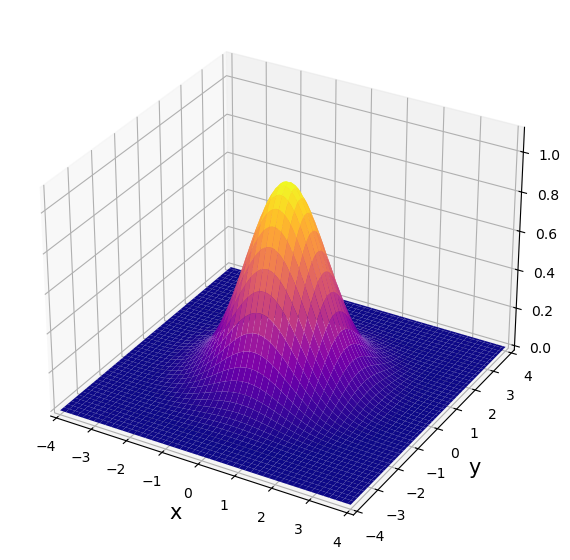

In [3]:
xs, ys, zs = two_d_gaussian()
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(7, 7), subplot_kw={"projection": "3d"})
xs, ys = np.meshgrid(xs, ys)
axs.set_xlabel("x", size=15)
axs.set_ylabel("y", size=15)
axs.set_zlabel("z", size=15)
axs.set(xlim=[-4, 4], ylim=[-4, 4], zlim=[0, 1.1])
axs.plot_surface(ys, xs, zs, cmap=cm.plasma, linewidth=0, antialiased=True)

Prepare the lists of properties for calls to the `two_d_gaussian()` function.

In [7]:
ms_per_frame = 33
frames = 300

x0_steps = np.concatenate([np.linspace(-4, 0, frames // 3), np.zeros(frames // 3), np.linspace(0, 4, frames // 3)])
y0_steps = np.concatenate([np.linspace(-4, 0, frames // 3), np.zeros(frames // 3), np.linspace(0, 4, frames // 3)])

And animate it!

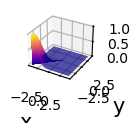

In [8]:
dpi = 100
width = 1080 / 10 / dpi
height = 1920 / 2 / 10 / dpi
seconds = 10
frame_rate_ms = 33
bgcolor = "#1E1E1E"
line_color = "#73FBD3"
axis_color = "#01BAEF"
annotation_color = "#FFFFFF"
# heading_text_color = "#FC7753"

xs, ys, zs = two_d_gaussian(x0=x0_steps[0], y0=y0_steps[0])
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(width, height), dpi=dpi, subplot_kw={"projection": "3d"})
xs, ys = np.meshgrid(xs, ys)
axs.set_xlabel("x", size=15)
axs.set_ylabel("y", size=15)
axs.set_zlabel("z", size=15)
sfc = axs.plot_surface(ys, xs, zs, cmap=cm.plasma, linewidth=0, antialiased=True)

def update(frame):
    xs, ys, zs = two_d_gaussian(x0=x0_steps[frame], y0=y0_steps[frame])
    sfc = axs.plot_surface(ys, xs, zs, cmap=cm.plasma, linewidth=0, antialiased=True)
    return sfc,

ani = animation.FuncAnimation(fig=fig, func=update, frames=10, interval=ms_per_frame)
ani.save(filename=os.path.join("output", "single_2d_gaussian.mp4"), writer="ffmpeg")